<a href="https://colab.research.google.com/github/Krithii06/Machine-learning-projects/blob/main/Health_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style


In [2]:
#loading the csv data into pandas data frame 
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
#Basic information of the given data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#loading the first five rows from the given data set
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#loading the last five rows from the given data set
insurance_data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#checking the total rows and columns from the given data set
insurance_data.shape

(1338, 7)

In [7]:
#statistical measure of the given data set 
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Finding the sum of the missing values of the given data set 
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

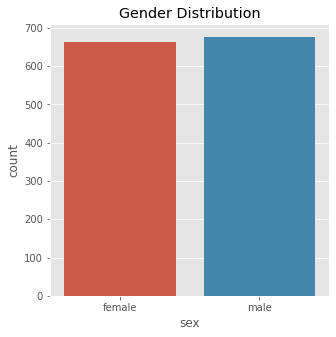

In [9]:
#setting the figure size
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=insurance_data)
plt.title("Gender Distribution")
plt.show()

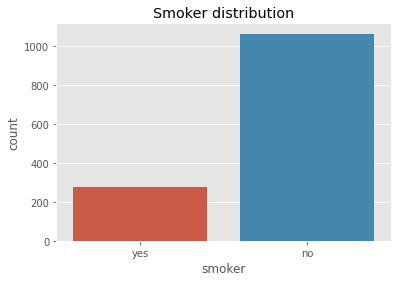

In [11]:
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker distribution')
plt.show()

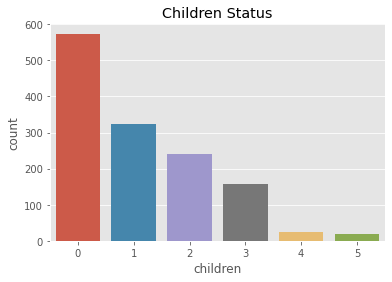

In [12]:
sns.countplot(x='children',data=insurance_data)
plt.title("Children Status")
plt.show()

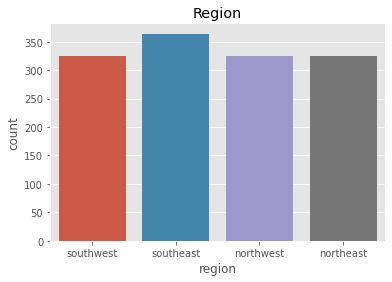

In [14]:
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

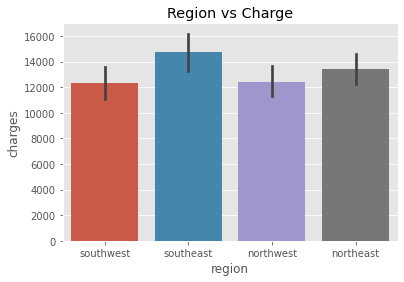

In [16]:
#checking the price range 
sns.barplot(x='region',y='charges',data=insurance_data)
plt.title("Region vs Charge")
plt.show()

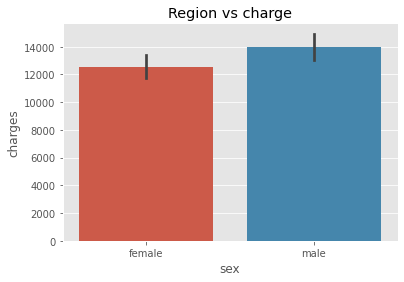

In [17]:
sns.barplot(x='sex',y='charges',data=insurance_data)
plt.title(' vs charge')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

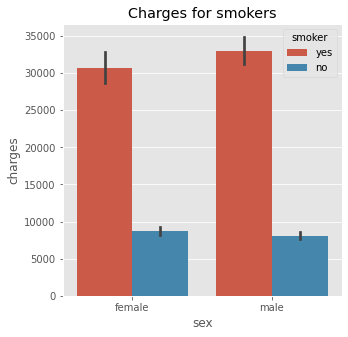

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=insurance_data)
plt.title('Charges for smokers')

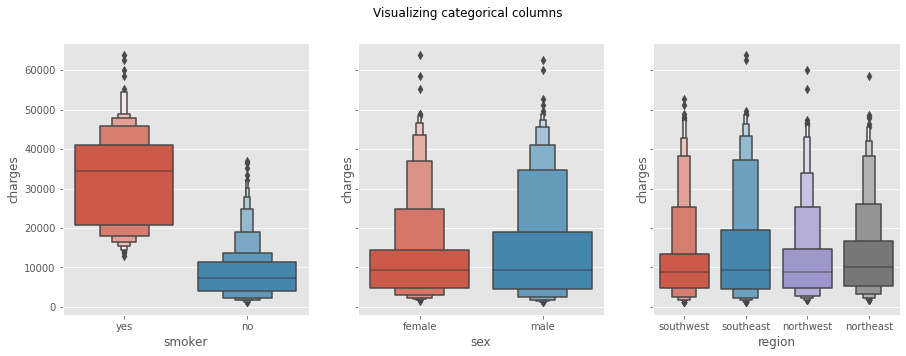

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=insurance_data, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=insurance_data, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=insurance_data, ax=axes[2])

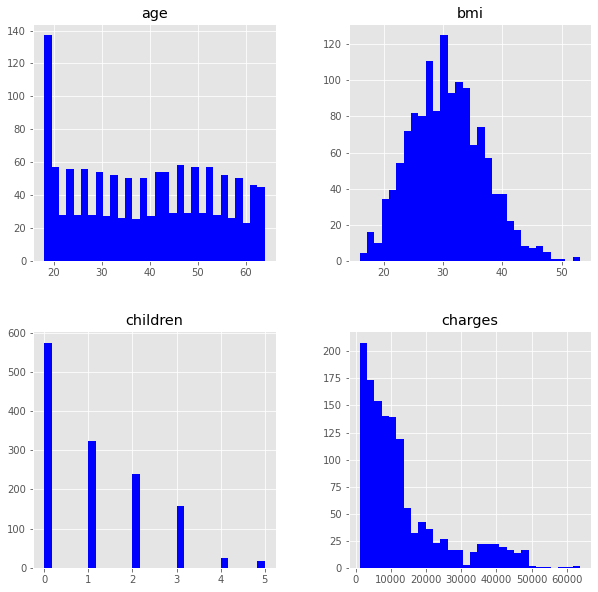

In [21]:
insurance_data[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

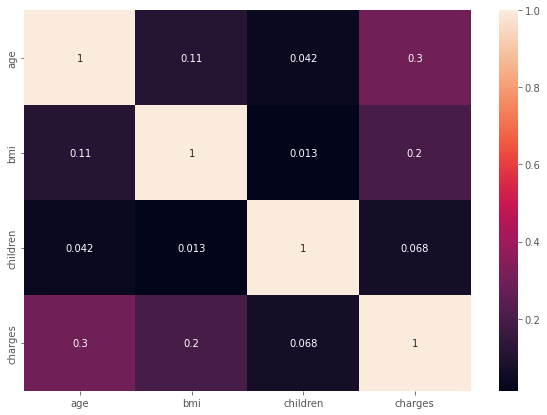

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(insurance_data.corr(), annot = True)
plt.show()

In [32]:
insurance_data['sex'] = insurance_data['sex'].apply({'male':0, 'female':1}.get)
insurance_data['smoker'] = insurance_data['smoker'].apply({'yes':1, 'no':0}.get)
insurance_data['region'] = insurance_data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [25]:
X = insurance_data.drop(['charges', 'sex'], axis=1)
y = insurance_data.charges

In [26]:
#splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


In [27]:
#Using Linear Regression
linreg = LinearRegression()

In [30]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_insurance_data = pd.DataFrame(data, index)
cust_insurance_data

,age,bmi,children,smoker,region
0,50,25,2,1,2
